In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D
from pandas.plotting import scatter_matrix
from sklearn import cluster

In [2]:
column_names = ("Elevation","Aspect","Slope","Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology","Horizontal_Distance_To_Roadways","Hillshade_9am","Hillshade_Noon","Hillshade_3pm","Horizontal_Distance_To_Fire_Points","Wilderness_Area_01","Wilderness_Area_02","Wilderness_Area_03","Wilderness_Area_04","Soil_Type_01","Soil_Type_02","Soil_Type_03","Soil_Type_04","Soil_Type_05","Soil_Type_06","Soil_Type_07","Soil_Type_08","Soil_Type_09","Soil_Type_10","Soil_Type_11","Soil_Type_12","Soil_Type_13","Soil_Type_14","Soil_Type_15","Soil_Type_16","Soil_Type_17","Soil_Type_18","Soil_Type_19","Soil_Type_20","Soil_Type_21","Soil_Type_22","Soil_Type_23","Soil_Type_24","Soil_Type_25","Soil_Type_26","Soil_Type_27","Soil_Type_28","Soil_Type_29","Soil_Type_30","Soil_Type_31","Soil_Type_32","Soil_Type_33","Soil_Type_34","Soil_Type_35","Soil_Type_36","Soil_Type_37","Soil_Type_38","Soil_Type_39","Soil_Type_40","Cover_Type"
)

In [3]:
soil = pd.read_table("covtype.data", sep=",", names=column_names)

In [4]:
# Copy first 50,000 rows into a new dataframe
soil2 = soil.copy(deep=True)
soil2.drop(soil2.index[50000:], inplace=True)

In [5]:
soil2.shape

(50000, 55)

In [6]:
soil2.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [7]:
# Copy dataframe
df_tr = soil2

In [8]:
clmns = ['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Hillshade_9am', 'Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points']
df_tr_std = stats.zscore(df_tr[clmns])

In [9]:
# Iterate through each column.
# Do the elbow curve
# Pick the best k value

In [10]:
current_clmns = []

for pos in range(2):
    current_clmns.append(clmns[pos])

In [11]:
print (current_clmns)

['Elevation', 'Aspect']


In [12]:
df_tr_std = stats.zscore(df_tr[current_clmns])

In [13]:
#Elbow curve

cluster_range  = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( df_tr_std )
  cluster_errors.append( clusters.inertia_ )

In [14]:
#Print Elbow curve table
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:10]

,cluster_errors,num_clusters
0,100000.000000,1
1,61607.054829,2
2,39520.273528,3
3,29826.976709,4
4,24171.733763,5
5,19999.803994,6
6,16867.256389,7
7,14073.695719,8
8,12072.061287,9
9,10986.471662,10


Text(0.5,1,'')

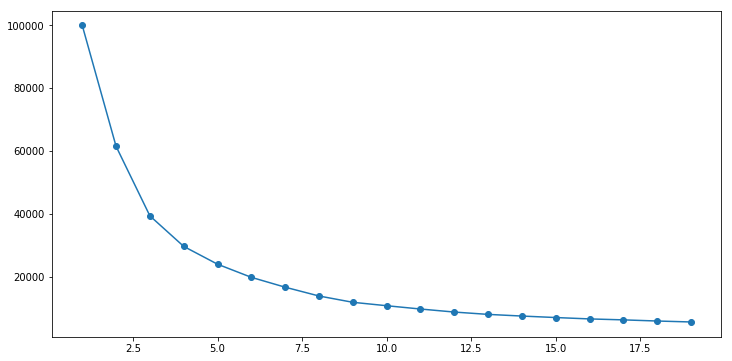

In [15]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.title("")

In [16]:
# Cluster the data based on best k
kmeans = KMeans(n_clusters=7, random_state=5).fit(df_tr_std)
labels = kmeans.labels_

In [17]:
#Glue back to original data
df_tr['clusters'] = labels

In [18]:
#Add the column into our list
current_clmns.extend(['clusters'])

#Lets analyze the clusters
#Find out how many instances in cluster
#print (df_tr[current_clmns].groupby(['clusters']).mean())

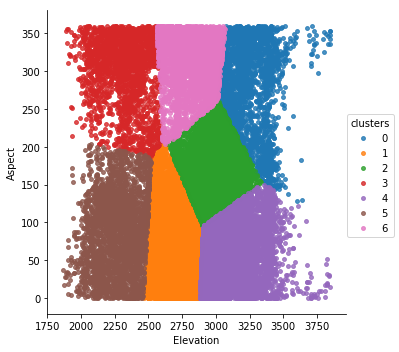

In [19]:
# Plot the graph
sns.lmplot(current_clmns[0], current_clmns[1], 
       data=df_tr, 
       fit_reg=False, 
       hue="clusters",  
       scatter_kws={"marker": "D", 
                    "s": 15})

In [20]:
# Confusion Matrix Result
# For Elavation and Aspect

model = cluster.KMeans(n_clusters = 7, random_state=5)

#Note that the training of the k means model only uses the X dataset, not the target labels of the digits dataset. 

fit = model.fit(df_tr_std)

soil2["cluster"] = fit.predict(df_tr_std)

#Then, we create the following two columns, to compare the predicted labels with the target labels. 

#soil2["target"] = soil2['Cover_Type'].unique()
soil2["c"] = "count"

# The following line includes three parts: we first select the cluster, target, and c columns. Then, we group them by the cluster and target columns. Finally, we aggregate the rows of the group with a simple count function. 

#clustering_result = soil2[["cluster", "Cover_Type", "c"]].groupby(["cluster", "Cover_Type"]).agg("count")
#print(clustering_result)

In [23]:
# Print confusion matrix
clustering_result = soil2[["cluster", "Cover_Type", "c"]].groupby(["cluster", "Cover_Type"]).agg("count")
(clustering_result.reset_index().pivot_table(index='Cover_Type', columns='cluster', values='c', aggfunc='sum', fill_value=0))

cluster,0,1,2,3,4,5,6
Cover_Type,,,,,,,
1,1180,1145,2086,1,4634,0,1105
2,501,12074,6854,193,4392,77,4702
3,0,518,33,779,0,753,77
4,0,9,0,413,0,1738,0
5,0,1425,462,15,67,26,421
6,0,494,0,850,0,610,206
7,893,0,95,0,1172,0,0


In [ ]:
# scatter_matrix(soil2, alpha=0.2, figsize=(4,4), diagonal='hist')
# plt.show()